# Project Notebook - Team 4

---


The main inspiration behind this project was that all of us in our group are sports fans at heart, and especially enjoy playing Basketball. We all like watching our favorite teams and players doing well in the game, and as is common among fans, like to have friendly debates on who is better, if their favorite teams are the best in the league, and the overall state of the league when it comes to performances. Most people eyeball the data and use general number comparisons to one another to come to quick conclusions about these, but with the power of Data Analysis and Visualization and a little Machine Learning, we can come up with more accurate conclusions about some questions we might have, and even predict in the future how likely an event is to happen, and what the most likely outcome of said event might actually be. Below, we will answer 5 different questions, as well as create 3 different Machine Learning models to answer our question of:

"Can we predict whether an NBA team will win a game based on its and its opponent’s statistics?

Group name: Group 4  
Created by Hardeep Kainth (016180424), Lohit Kishore (01698400), Hruday Prathipati (015830906), Jimmy Valdez (017352270)   
Last updated: 11/28/25   

In [ ]:
import numpy as np
import pandas as pd
import warnings; warnings.filterwarnings("ignore")

# plotly library
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
import panel as pn

# matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#scikit learn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from google.colab import drive


Our dataset that we will use contains information of box scores for each player from games between 2010 and 2024. Each row will contain the season and the game that was played with its own ID. There are a total of around 425,000 values in this dataframe once combined, which will be manipulated and used to do our data analysis. The original .csv files can be found here:


https://github.com/NocturneBear/NBA-Data-2010-2024/blob/main/regular_season_box_scores_2010_2024_part_1.csv
https://github.com/NocturneBear/NBA-Data-2010-2024/blob/main/regular_season_box_scores_2010_2024_part_2.csv
https://github.com/NocturneBear/NBA-Data-2010-2024/blob/main/regular_season_box_scores_2010_2024_part_3.csv
https://github.com/NocturneBear/NBA-Data-2010-2024/blob/main/regular_season_totals_2010_2024.csv




Note, for the below cell, if you're running it outside of Colab and in an environment on your computer such as Jupyter Notebook or Jupyter Lab, make sure the .csv files are in the same directory as this notebook, comment out the Google Drive code, and uncomment the native code. The rest of the file should work the same way.

If you are using the Google Drive code (IMPORTANT!!!!) Upload the CSsVs after downloading it from GitHub into your drive and UPDATE THE FILE LOCATIONS to wherever you uploaded it. For example, I uploaded the files in a folder called Colab Notebooks, so I added that to the file path. Change it as needed.

In [ ]:
# Native Code
# player_df_1 = pd.read_csv('regular_season_box_scores_2010_2024_part_1.csv')
# player_df_2 = pd.read_csv('regular_season_box_scores_2010_2024_part_2.csv')
# player_df_3 = pd.read_csv('regular_season_box_scores_2010_2024_part_3.csv')
# team_df = pd.read_csv('regular_season_totals_2010_2024.csv')


# Comment out this block if you are using the Native Code
drive.mount('/content/drive')
player_df_1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/regular_season_box_scores_2010_2024_part_1.csv')
player_df_2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/regular_season_box_scores_2010_2024_part_2.csv')
player_df_3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/regular_season_box_scores_2010_2024_part_3.csv')
team_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/regular_season_totals_2010_2024.csv')

frames = [player_df_1, player_df_2, player_df_3]

player_df = pd.concat(frames)

Mounted at /content/drive


Now that we have the dataframe loaded in, let's analyze it! We can run info and check to see what the columns look like, and what we can do with the data for some quick, initial analysis and data cleaning.

Also, please note that this data cleaning is involved for both our analysis and our Machine Learning section, so this takes out two birds with one stone.

In [ ]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424478 entries, 0 to 141491
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   season_year              424478 non-null  object 
 1   game_date                424478 non-null  object 
 2   gameId                   424478 non-null  int64  
 3   matchup                  424478 non-null  object 
 4   teamId                   424478 non-null  int64  
 5   teamCity                 424478 non-null  object 
 6   teamName                 424478 non-null  object 
 7   teamTricode              424478 non-null  object 
 8   teamSlug                 424478 non-null  object 
 9   personId                 424478 non-null  int64  
 10  personName               424478 non-null  object 
 11  position                 166580 non-null  object 
 12  comment                  73005 non-null   object 
 13  jerseyNum                0 non-null       float64
 14  minutes  

Immediately, we notice that there are 424,478 entries, and some values have null values, which are contained in minutes, position, comment, and jerseyNum. Let's check out the first few values of the dataframe to see what the table looks like.

In [ ]:
player_df.head()

,season_year,game_date,gameId,matchup,teamId,teamCity,teamName,teamTricode,teamSlug,personId,...,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints
0,2010-11,2010-11-10,21000112,NJN @ CLE,1610612751,New Jersey,Nets,NJN,nets,693,...,0,0,0,0,0,0,0,0,0,-4
1,2010-11,2010-11-17,21000165,NJN @ UTA,1610612751,New Jersey,Nets,NJN,nets,693,...,0,0,0,0,0,0,0,0,0,0
2,2010-11,2010-11-27,21000237,NJN @ PHI,1610612751,New Jersey,Nets,NJN,nets,693,...,0,0,0,0,0,0,0,0,0,0
3,2010-11,2010-12-12,21000351,NJN vs. LAL,1610612751,New Jersey,Nets,NJN,nets,693,...,0,0,0,0,0,0,0,0,0,0
4,2010-11,2010-10-29,21000020,NJN vs. SAC,1610612751,New Jersey,Nets,NJN,nets,693,...,0,1,1,1,0,0,1,1,2,6


In [ ]:
player_df.describe()

,gameId,teamId,personId,jerseyNum,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,...,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints
count,4.244780e+05,4.244780e+05,4.244780e+05,0.0,424478.000000,424478.000000,424478.000000,424478.000000,424478.000000,424478.000000,...,424478.000000,424478.000000,424478.000000,424478.000000,424478.000000,424478.000000,424478.000000,424478.000000,424478.000000,424478.0000
mean,2.165769e+07,1.610613e+09,6.443729e+05,NaN,3.089234,6.722224,0.351962,0.774655,2.162084,0.187922,...,0.824469,2.585309,3.409779,1.835330,0.598358,0.382941,1.065617,1.572258,8.322723,0.0000
std,4.020167e+05,8.646841e+00,6.954090e+05,NaN,3.139333,6.042858,0.277982,1.265964,2.704229,0.279756,...,1.312292,2.736618,3.535324,2.451931,0.920657,0.788628,1.357726,1.513591,8.406330,9.9313
min,2.100000e+07,1.610613e+09,2.550000e+02,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58.0000
25%,2.130078e+07,1.610613e+09,2.015680e+05,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.0000
50%,2.170001e+07,1.610613e+09,2.030860e+05,NaN,2.000000,6.000000,0.381000,0.000000,1.000000,0.000000,...,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,6.000000,0.0000
75%,2.200068e+07,1.610613e+09,1.627783e+06,NaN,5.000000,10.000000,0.533000,1.000000,4.000000,0.333000,...,1.000000,4.000000,5.000000,3.000000,1.000000,1.000000,2.000000,3.000000,13.000000,5.0000
max,2.230123e+07,1.610613e+09,1.642013e+06,NaN,25.000000,50.000000,1.000000,14.000000,24.000000,1.000000,...,18.000000,23.000000,31.000000,25.000000,10.000000,12.000000,12.000000,6.000000,73.000000,57.0000


head() and describe() don't really show the values, as it is truncated, so let's see if we can see the values where minutes are null. We can use the data mask technique isnull() to filter out the rows in the dataframe where minutes are null.

In [ ]:
player_df[player_df["minutes"].isnull()]

,season_year,game_date,gameId,matchup,teamId,teamCity,teamName,teamTricode,teamSlug,personId,...,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints
1,2010-11,2010-11-17,21000165,NJN @ UTA,1610612751,New Jersey,Nets,NJN,nets,693,...,0,0,0,0,0,0,0,0,0,0
2,2010-11,2010-11-27,21000237,NJN @ PHI,1610612751,New Jersey,Nets,NJN,nets,693,...,0,0,0,0,0,0,0,0,0,0
3,2010-11,2010-12-12,21000351,NJN vs. LAL,1610612751,New Jersey,Nets,NJN,nets,693,...,0,0,0,0,0,0,0,0,0,0
5,2010-11,2010-12-14,21000361,NJN vs. PHI,1610612751,New Jersey,Nets,NJN,nets,693,...,0,0,0,0,0,0,0,0,0,0
8,2010-11,2010-11-19,21000180,NJN @ SAC,1610612751,New Jersey,Nets,NJN,nets,693,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141481,2023-24,2024-04-14,22301186,WAS @ BOS,1610612764,Washington,Wizards,WAS,wizards,1641774,...,0,0,0,0,0,0,0,0,0,0
141486,2023-24,2024-01-20,22300594,WAS vs. SAS,1610612764,Washington,Wizards,WAS,wizards,1641998,...,0,0,0,0,0,0,0,0,0,0
141488,2023-24,2024-01-21,22300602,WAS vs. DEN,1610612764,Washington,Wizards,WAS,wizards,1641998,...,0,0,0,0,0,0,0,0,0,0
141489,2023-24,2024-01-29,22300665,WAS @ SAS,1610612764,Washington,Wizards,WAS,wizards,1641998,...,0,0,0,0,0,0,0,0,0,0


We can see here that these are either stats for people that did not play in the game, or were injured in some way. When we aggregare statistics, generally we leave out games in which players didn't play in. For example, if the player played for 5 games out of 10, their averages would be considered from only those 5, not out of 10. Therefore, we can drop columns where the minutes are null or if the minutes are 0.0, to clean up bad data.

In [ ]:
indices_to_drop = player_df[player_df["minutes"].isnull()].index
player_df.drop(indices_to_drop, inplace=True)

indices_to_drop = player_df[player_df["minutes"] == 0.0].index
player_df.drop(indices_to_drop, inplace=True)

player_df.describe()

,gameId,teamId,personId,jerseyNum,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,...,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints
count,2.417090e+05,2.417090e+05,2.417090e+05,0.0,241709.000000,241709.000000,241709.000000,241709.000000,241709.000000,241709.000000,...,241709.000000,241709.000000,241709.000000,241709.000000,241709.000000,241709.000000,241709.000000,241709.000000,241709.000000,241709.000000
mean,2.164413e+07,1.610613e+09,6.081912e+05,NaN,3.744114,8.151778,0.425324,0.938376,2.619679,0.227499,...,0.998577,3.142676,4.141252,2.227803,0.724474,0.465005,1.296944,1.900194,10.086571,0.016383
std,3.996202e+05,8.623308e+00,6.804050e+05,NaN,3.082539,5.719540,0.248604,1.335906,2.769577,0.292602,...,1.384201,2.734963,3.513645,2.539897,0.967422,0.849316,1.398003,1.464670,8.238360,10.933286
min,2.100000e+07,1.610613e+09,2.550000e+02,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58.000000
25%,2.130065e+07,1.610613e+09,2.012290e+05,NaN,1.000000,4.000000,0.286000,0.000000,0.000000,0.000000,...,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,-7.000000
50%,2.160102e+07,1.610613e+09,2.027300e+05,NaN,3.000000,7.000000,0.440000,0.000000,2.000000,0.000000,...,1.000000,3.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000
75%,2.200043e+07,1.610613e+09,1.627734e+06,NaN,6.000000,12.000000,0.571000,1.000000,4.000000,0.429000,...,1.000000,5.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,15.000000,7.000000
max,2.230123e+07,1.610613e+09,1.642013e+06,NaN,25.000000,50.000000,1.000000,14.000000,24.000000,1.000000,...,16.000000,23.000000,31.000000,25.000000,10.000000,12.000000,12.000000,6.000000,73.000000,57.000000


Now, we can analyze how the team dataframe looks like below.

In [ ]:
team_df.head()

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,AVAILABLE_FLAG
0,2022-23,1610612744,GSW,Golden State Warriors,22201230,2023-04-09T00:00:00,GSW @ POR,W,48.0,58,...,1,1578,55,512,457,678,2455,3,1,1.0
1,2020-21,1610612749,MIL,Milwaukee Bucks,22000051,2020-12-29T00:00:00,MIL @ MIA,W,48.0,51,...,146,1636,33,1830,1361,1552,1220,14,7,1.0
2,2013-14,1610612751,BKN,Brooklyn Nets,21300359,2013-12-16T00:00:00,BKN vs. PHI,W,48.0,47,...,22,2280,406,1979,1,1004,453,19,12,1.0
3,2013-14,1610612757,POR,Portland Trail Blazers,21300347,2013-12-14T00:00:00,POR @ PHI,W,48.0,52,...,2,2065,628,204,1269,272,2190,4,15,1.0
4,2018-19,1610612745,HOU,Houston Rockets,21801200,2019-04-07T00:00:00,HOU vs. PHX,W,48.0,53,...,84,176,149,917,1,244,1725,4,20,1.0


In [ ]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33316 entries, 0 to 33315
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEASON_YEAR        33316 non-null  object 
 1   TEAM_ID            33316 non-null  int64  
 2   TEAM_ABBREVIATION  33316 non-null  object 
 3   TEAM_NAME          33316 non-null  object 
 4   GAME_ID            33316 non-null  int64  
 5   GAME_DATE          33316 non-null  object 
 6   MATCHUP            33316 non-null  object 
 7   WL                 33316 non-null  object 
 8   MIN                33316 non-null  float64
 9   FGM                33316 non-null  int64  
 10  FGA                33316 non-null  int64  
 11  FG_PCT             33316 non-null  float64
 12  FG3M               33316 non-null  int64  
 13  FG3A               33316 non-null  int64  
 14  FG3_PCT            33316 non-null  float64
 15  FTM                33316 non-null  int64  
 16  FTA                333

In [ ]:
team_df.describe()

,TEAM_ID,GAME_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,AVAILABLE_FLAG
count,3.331600e+04,3.331600e+04,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,...,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,28862.000000
mean,1.610613e+09,2.165283e+07,48.339776,39.359827,85.647617,0.460423,9.869852,27.547034,0.355998,17.450024,...,1128.053638,1108.546464,1077.680214,1057.020471,1057.020561,1115.424631,1115.423880,1167.676732,1169.894105,1.005544
std,8.651636e+00,4.023304e+05,1.469626,5.401603,7.659556,0.055579,4.254890,9.153398,0.097534,5.991188,...,691.101375,697.767364,682.948212,673.469695,708.624790,697.032428,690.331251,694.472247,695.004989,0.119930
min,1.610613e+09,2.100000e+07,47.985000,16.000000,59.000000,0.246000,0.000000,3.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.610613e+09,2.130072e+07,48.000000,36.000000,80.000000,0.422000,7.000000,21.000000,0.292000,13.000000,...,533.000000,478.000000,494.000000,512.000000,425.000000,523.000000,486.000000,557.000000,573.000000,1.000000
50%,1.610613e+09,2.160119e+07,48.000000,39.000000,85.000000,0.459000,10.000000,27.000000,0.355000,17.000000,...,1099.000000,1059.000000,1036.000000,983.000000,1008.000000,1110.000000,1059.000000,1145.000000,1174.000000,1.000000
75%,1.610613e+09,2.200061e+07,48.000000,43.000000,91.000000,0.500000,13.000000,34.000000,0.419000,21.000000,...,1696.000000,1716.000000,1605.000000,1635.000000,1636.000000,1672.000000,1720.000000,1748.000000,1743.000000,1.000000
max,1.610613e+09,2.230123e+07,68.000000,65.000000,129.000000,0.687000,29.000000,70.000000,0.842000,52.000000,...,2460.000000,2460.000000,2459.000000,2437.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2.000000


We can't see some rows of the data, so let's do a check to see how clean the data is. Currently, the lowest number of points scored in a game was 56, by the Orlando Magic and the Milwaukee Bucks. Let's see if the data reflects that!

In [ ]:
team_df[team_df["PTS"] <= 56]

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,AVAILABLE_FLAG
21693,2011-12,1610612753,ORL,Orlando Magic,21100243,2012-01-23T00:00:00,ORL @ BOS,L,48.0,16,...,1918,1960,1531,521,1784,343,624,1980,1950,NaN
29908,2010-11,1610612749,MIL,Milwaukee Bucks,21000988,2011-03-13T00:00:00,MIL @ BOS,L,48.0,22,...,2353,2008,1130,2024,813,1439,2202,2460,2431,NaN


Great, the check passed and the data looks very clean on its own! Let's get to the data analysis section

##Question 1: How does having multiple players scoring double digits affect a team’s chances of winning the game?

To answer this question, we have to figure out how many double digit scorers there are in a given game, and once we do that, we can count the proportion of wins with X number of double digit scorers, and plot the results.

To do this, we need data from both the player and team dataframes, so we need to rename some rows to merge them together.

In [ ]:
# Rename the team dataframe to follow the player dataframe conventions
team_df = team_df.rename(columns={'GAME_ID': 'gameId','TEAM_ID': 'teamId'})

Now, we can merge the WL from the team dataframe with the player dataframe on the gameId and the teamId.

In [ ]:
merged_df = pd.merge(player_df,team_df[['gameId', 'teamId', 'WL']],on=['gameId', 'teamId'],how='left')

Now, we can find the number of double digit scorers. First, we need to find the number of players in a game that have points greater than 10 (we call this double_digit, which is 1 if the points are greater than 10, and 0 if not), and find the sum of these values for each team to find the number of double digit scorers

In [ ]:
double_digit_scorers = (
    # Count if the points is greater than 10, called double_digit
    merged_df.assign(double_digit = merged_df['points'] >= 10)
    # Group by the gameId and teamId so that we can find the number of double_digit scorers in a game per team
          .groupby(['gameId', 'teamId'])
          # Because the double_digit is 1 and 0, adding them gives the number of double digit players. Mark the result as well
          .agg(double_digit_players = ('double_digit', 'sum'), result = ('WL', 'first')).reset_index())

Now, we can group by the number of double digit scorers and find the win proportion. We can use a lambda function to transform the wins and losses to 1s and 0s, and find the mean of these values to find the win percentage. We can them plot the win rates to visualize what the proportion is

In [ ]:
win_rates = (
    double_digit_scorers.groupby('double_digit_players')['result']
    # Wins and Losses are in W and L, so x == 'W' in this case comes out as True,
    # which is signified as 1 for True, and anything else (only 'L') is 0.
    .apply(lambda x: (x == 'W').mean())
)

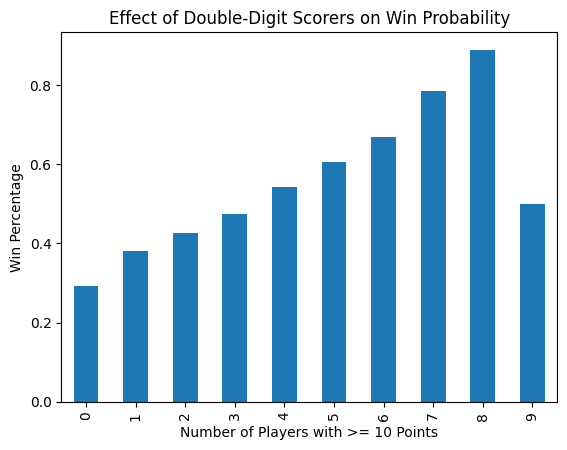

In [ ]:
win_rates.plot(kind='bar')
plt.ylabel('Win Percentage')
plt.xlabel('Number of Players with >= 10 Points')
plt.title('Effect of Double-Digit Scorers on Win Probability')
plt.show()

We can see here is that the higher the number of double digit scorers, the higher the odds of winning are according to this dataset, except for when there a more than 9 double digit scorers, which in my opinion, is an incredibly rare circumstance.

##Question 2: How do defensive stats(blocks, steals, def rebounds) correlate with a team’s chances of winning?

This one is quite simple. Pandas has the function ready for us, which is the corr() function. We can take each defensive stat, and find its correlation to the win column, and then plot it

In [ ]:
team_df['WIN'] = (team_df['WL'] == 'W').astype(int)

In [ ]:
defensive_cols = ['STL', 'BLK', 'DREB']

correlations = team_df[defensive_cols + ['WIN']].corr()['WIN'].sort_values(ascending=False)
print(correlations)

WIN     1.000000
DREB    0.351149
BLK     0.163352
STL     0.131769
Name: WIN, dtype: float64


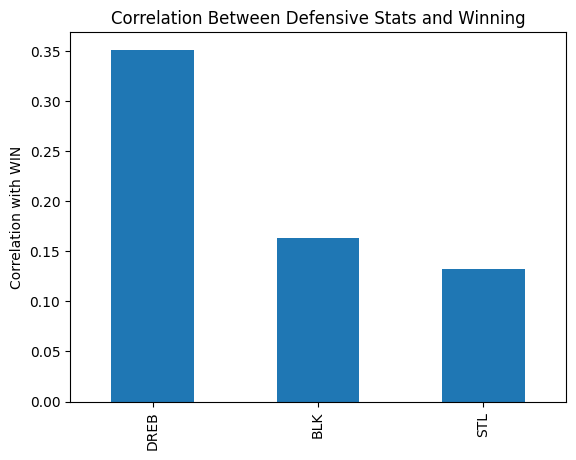

In [ ]:
correlations.drop('WIN').plot(kind='bar')
plt.title("Correlation Between Defensive Stats and Winning")
plt.ylabel("Correlation with WIN")
plt.show()

We find out that it's not actually steals and blocks that have the most impact on win probability, it's actually defensive rebounding, with it mattering almost twice as much as steals and blocks, with the correlation being 35% compared to 15% and 13% of the other two.

##Question 3: Does a higher PPG from a team’s highest scorer correlate with their winning record?

To find this, we need to find the highest PPG scorer in the season, and the proportion of wins. We can do this by grouping players by the season, team, and person, and finding the highest PPG from the first in descending order

In [ ]:
player_stats = player_df.groupby(['season_year', 'teamId', 'personId']).agg(total_points=('points', 'sum'), games_played=('gameId', 'nunique')).reset_index()

# Essentially PPG is the average number of points in a game
player_stats['PPG'] = player_stats['total_points'] / player_stats['games_played']

# Get the highest PPG player per team per season by sorting PPG in descending order.
# The order of season_year and teamId doesn't really matter other than readability
top_scorers = player_stats.sort_values(['season_year', 'teamId', 'PPG'], ascending=[True, True, False]).groupby(['season_year', 'teamId']).first().reset_index()

In [ ]:
team_wins = team_df.groupby(['SEASON_YEAR', 'teamId']).agg(total_wins=('WL', lambda x: (x == 'W').sum()),total_games=('gameId', 'nunique')).reset_index()

# Calculate win percentage
team_wins['win_pct'] = team_wins['total_wins'] / team_wins['total_games']

Now that we have the highest PPG for each team in each season and the win percentages of all these teams, we can merge them together, find the correlation, and plot the scatter plot showing the win percentage vs PPG

In [ ]:
# Merge the win percentage with the top scorers
ppg_and_record = pd.merge(top_scorers,team_wins,left_on=['season_year', 'teamId'],right_on=['SEASON_YEAR', 'teamId'])

In [ ]:
corr = ppg_and_record['PPG'].corr(ppg_and_record['win_pct'])
corr

np.float64(0.36400283315658455)

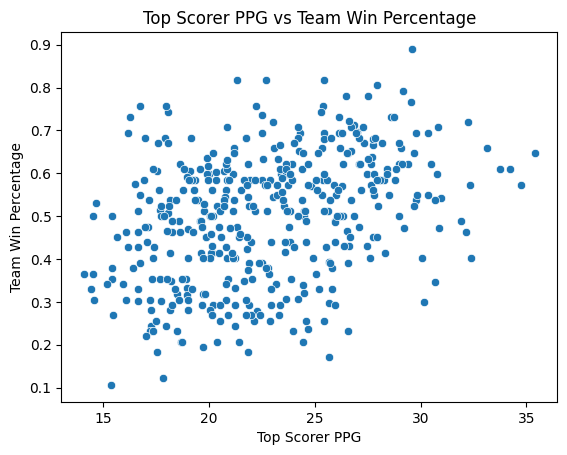

In [ ]:
sns.scatterplot(data=ppg_and_record, x='PPG', y='win_pct')
plt.xlabel("Top Scorer PPG")
plt.ylabel("Team Win Percentage")
plt.title("Top Scorer PPG vs Team Win Percentage")
plt.show()

From this, we can see that there is a light correlation, but not too extreme of a correlation. The visualization doesn't identify a clear pattern

##Question 4: Does homecourt advantage noticeably increase a team’s chances of winning?

This one is quite straightforward to solve also, but only once we extract a certain factor from the matchup column. Typically, in Basketball notation, matchups for home games are labelled with "vs" in the matchups. For example, LAL vs DAL means that LAL is currently at home vs DAL. However, if it is an away game, it will be signified with an @. In this case, it would be LAL @ DAL, because there are playing the game at Dallas away from home. Therefore, a game is at home if "vs" exists in the matchup, which we can extract with a lambda function.

In [ ]:
team_df["is_home"] = team_df["MATCHUP"].apply(lambda x: "vs" in x)

Note, for the next line, the tilda (~) is a negation, meaning everything where is_home is NOT true. This represents the away percentage.

In [ ]:
home_win_pct = team_df[team_df["is_home"]]["WIN"].mean()
away_win_pct = team_df[~team_df["is_home"]]["WIN"].mean()

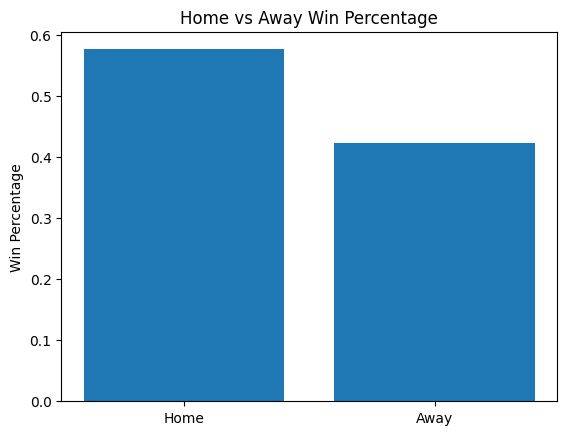

In [ ]:
plt.bar(["Home", "Away"], [home_win_pct, away_win_pct])
plt.ylabel("Win Percentage")
plt.title("Home vs Away Win Percentage")
plt.show()

Looking at the pot, we can see that having a home game gives teams a slight advantage, but it isn't anything too noticeable, likely 55/45% odds higher.

##Question 5: Interactive plot of each team’s roster and their scoring

This interactive graph lets you select the season and the team, and see the points per game of al players on the team roster that played a game for that team.

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

Colab sometimes doesn't show the charts in line, so this needs to be ran to force it to be in line. I had this issue when trying to get the graph to run.

In [ ]:
pio.renderers.default = "colab"
pio.renderers.default

'colab'

Column
    [0] Row
        [0] Select(name='Season', options=['2010-11', '2011-12', ...], value='2010-11')
        [1] Select(name='Team', options=['76ers', 'Bobcats', ...], value='76ers')
    [1] ParamFunction(function, _pane=Column, defer_load=False)
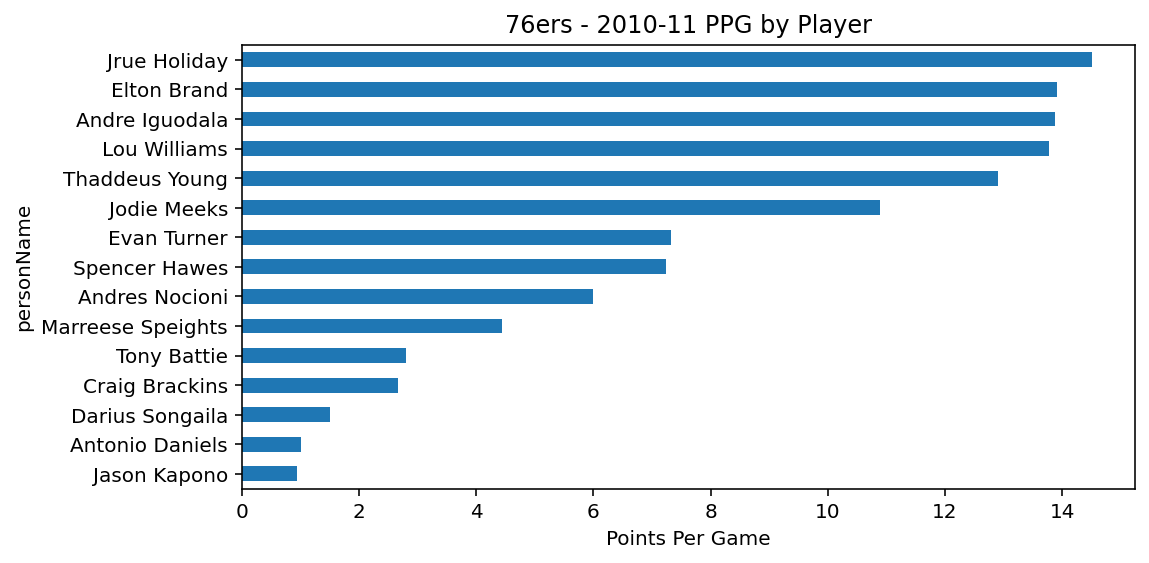

In [ ]:
pn.extension()

season_select = pn.widgets.Select(name="Season",options=sorted(player_df["season_year"].unique()))

team_select = pn.widgets.Select(name="Team", options=[])


container = pn.Column(sizing_mode="stretch_width")


def update_team_list(event):
    selected_season = event.new

    # Filter teams that appear in that season
    teams = sorted(player_df.loc[player_df["season_year"] == selected_season, "teamName"].unique())

    team_select.options = teams

    # Reset to first team if old one is invalid
    if team_select.value not in teams:
        team_select.value = teams[0] if teams else None

season_select.param.watch(update_team_list, "value")

# Initialize team dropdown for the initial season
update_team_list(type("Event", (), {"new": season_select.value}))

def plot_team_ppg(season, team):

    container.clear()

    if not team:
        container.append(pn.pane.Str("No teams available for this season"))
        return container

    df = player_df[(player_df["season_year"] == season) &(player_df["teamName"] == team)]

    if df.empty:
        container.append(pn.pane.Str("No data for this selection"))
        return container

    fig, ax = plt.subplots(figsize=(8, 4))
    df.groupby("personName")["points"].mean().sort_values().plot(kind="barh", ax=ax)
    ax.set_title(f"{team} - {season} PPG by Player")
    ax.set_xlabel("Points Per Game")

    container.append(pn.pane.Matplotlib(fig, tight=True))
    plt.close(fig)

    return container

interactive_output = pn.bind(
    plot_team_ppg,
    season=season_select,
    team=team_select
)

dashboard = pn.Column(
    pn.Row(season_select, team_select),
    interactive_output
)

dashboard

#Machine Learning Question: “Can we predict whether an NBA team will win a game based on its and its opponent’s statistics?”

Now, we can get started with prepping the Machine Learning pipeline! Note that some of the data prepping was done beforehand in terms of looking at the data and filtering out what was "bad" in terms of rows. Now, we can look at what specific columns we want for our model. Let's take a look at the features of our previously used team dataframe

In [ ]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33316 entries, 0 to 33315
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEASON_YEAR        33316 non-null  object 
 1   teamId             33316 non-null  int64  
 2   TEAM_ABBREVIATION  33316 non-null  object 
 3   TEAM_NAME          33316 non-null  object 
 4   gameId             33316 non-null  int64  
 5   GAME_DATE          33316 non-null  object 
 6   MATCHUP            33316 non-null  object 
 7   WL                 33316 non-null  object 
 8   MIN                33316 non-null  float64
 9   FGM                33316 non-null  int64  
 10  FGA                33316 non-null  int64  
 11  FG_PCT             33316 non-null  float64
 12  FG3M               33316 non-null  int64  
 13  FG3A               33316 non-null  int64  
 14  FG3_PCT            33316 non-null  float64
 15  FTM                33316 non-null  int64  
 16  FTA                333

Let's plot histograms of the different numerical features of the data to see if we need to do any balancing of the distributions or not

In [ ]:
team_df.describe()

,teamId,gameId,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,AVAILABLE_FLAG,WIN
count,3.331600e+04,3.331600e+04,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,...,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,28862.000000,33316.000000
mean,1.610613e+09,2.165283e+07,48.339776,39.359827,85.647617,0.460423,9.869852,27.547034,0.355998,17.450024,...,1108.546464,1077.680214,1057.020471,1057.020561,1115.424631,1115.423880,1167.676732,1169.894105,1.005544,0.500000
std,8.651636e+00,4.023304e+05,1.469626,5.401603,7.659556,0.055579,4.254890,9.153398,0.097534,5.991188,...,697.767364,682.948212,673.469695,708.624790,697.032428,690.331251,694.472247,695.004989,0.119930,0.500008
min,1.610613e+09,2.100000e+07,47.985000,16.000000,59.000000,0.246000,0.000000,3.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.610613e+09,2.130072e+07,48.000000,36.000000,80.000000,0.422000,7.000000,21.000000,0.292000,13.000000,...,478.000000,494.000000,512.000000,425.000000,523.000000,486.000000,557.000000,573.000000,1.000000,0.000000
50%,1.610613e+09,2.160119e+07,48.000000,39.000000,85.000000,0.459000,10.000000,27.000000,0.355000,17.000000,...,1059.000000,1036.000000,983.000000,1008.000000,1110.000000,1059.000000,1145.000000,1174.000000,1.000000,0.500000
75%,1.610613e+09,2.200061e+07,48.000000,43.000000,91.000000,0.500000,13.000000,34.000000,0.419000,21.000000,...,1716.000000,1605.000000,1635.000000,1636.000000,1672.000000,1720.000000,1748.000000,1743.000000,1.000000,1.000000
max,1.610613e+09,2.230123e+07,68.000000,65.000000,129.000000,0.687000,29.000000,70.000000,0.842000,52.000000,...,2460.000000,2459.000000,2437.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2.000000,1.000000


array([[<Axes: title={'center': 'teamId'}>,
        <Axes: title={'center': 'gameId'}>,
        <Axes: title={'center': 'MIN'}>, <Axes: title={'center': 'FGM'}>,
        <Axes: title={'center': 'FGA'}>,
        <Axes: title={'center': 'FG_PCT'}>,
        <Axes: title={'center': 'FG3M'}>],
       [<Axes: title={'center': 'FG3A'}>,
        <Axes: title={'center': 'FG3_PCT'}>,
        <Axes: title={'center': 'FTM'}>, <Axes: title={'center': 'FTA'}>,
        <Axes: title={'center': 'FT_PCT'}>,
        <Axes: title={'center': 'OREB'}>,
        <Axes: title={'center': 'DREB'}>],
       [<Axes: title={'center': 'REB'}>, <Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'TOV'}>, <Axes: title={'center': 'STL'}>,
        <Axes: title={'center': 'BLK'}>,
        <Axes: title={'center': 'BLKA'}>, <Axes: title={'center': 'PF'}>],
       [<Axes: title={'center': 'PFD'}>, <Axes: title={'center': 'PTS'}>,
        <Axes: title={'center': 'PLUS_MINUS'}>,
        <Axes: title={'center': 'G

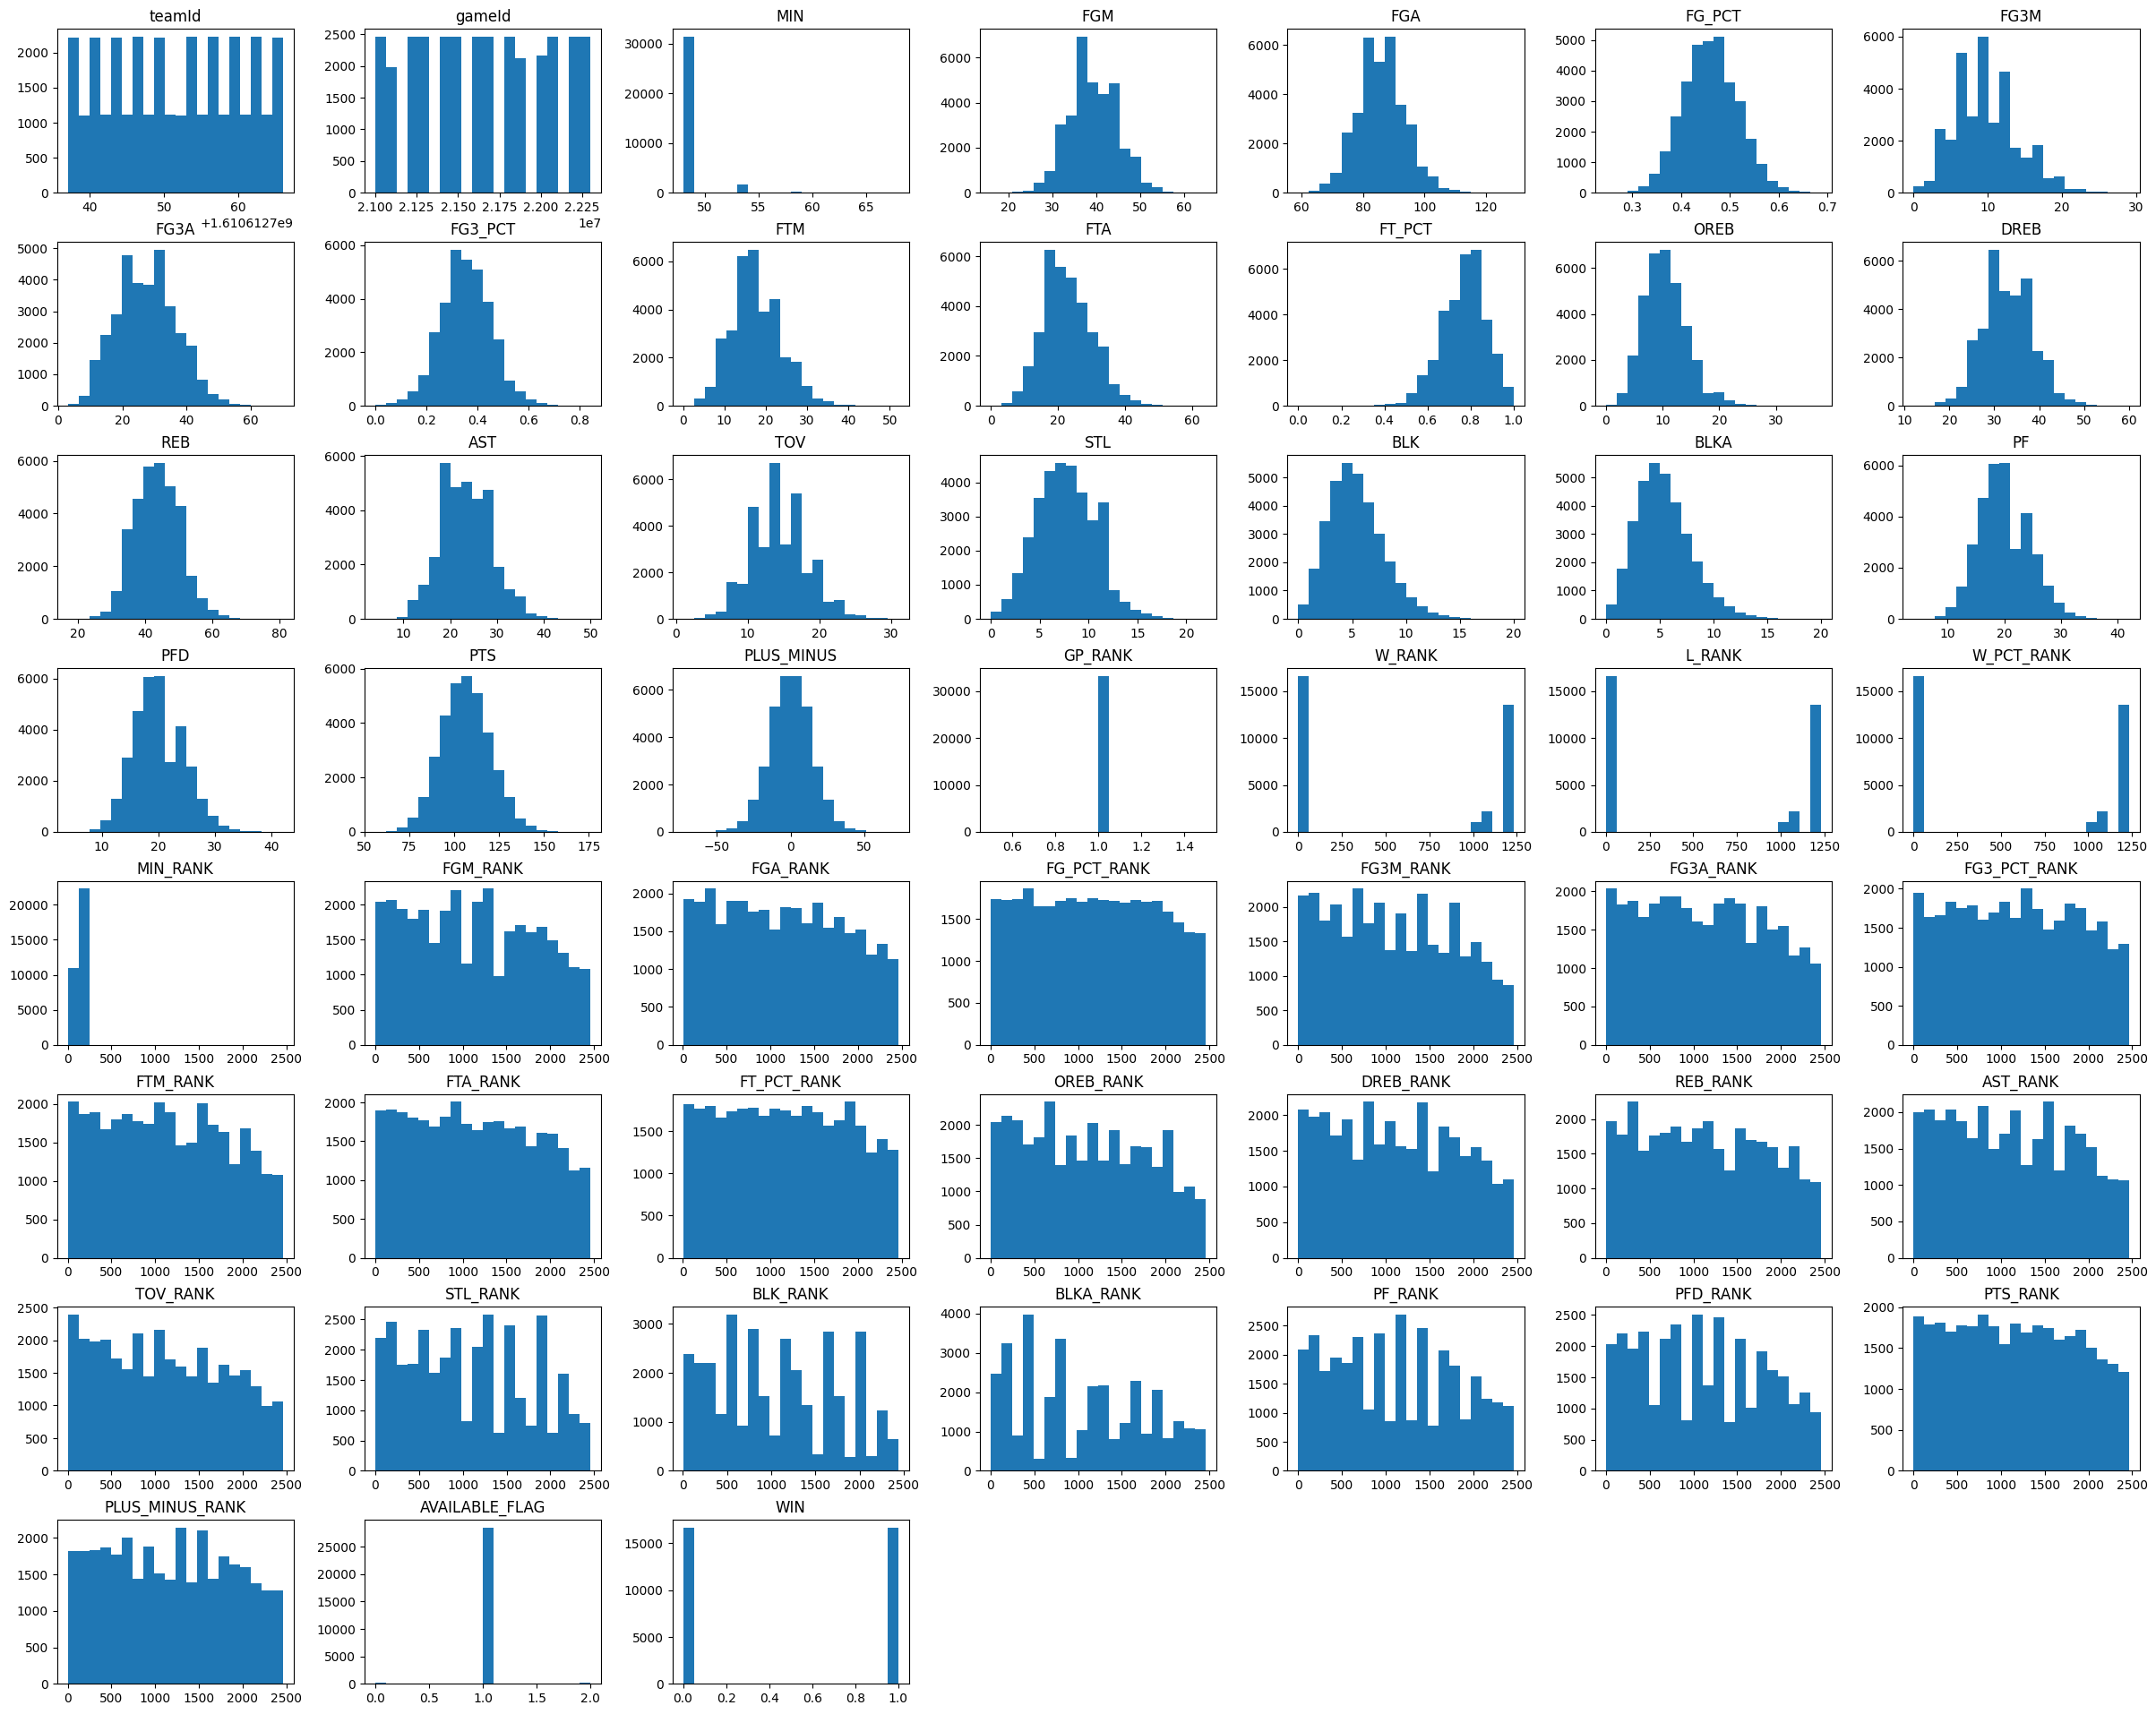

In [ ]:
team_df.hist(figsize=(30, 24), bins=20, grid=False)

From here, we can see that the RANK colums aren't really a column we're going to use anyway, and those distributions are super random. But in this case, for the columns we want to use, such as the raw stat numbers, those are in a normal distribution! The data looks good, we don't seem to need to do balancing! Maybe all we need to do is a bit of scaling to make sure nothing outweights the other, but after that, we can get to plotting!

Now, what we need to do will take a bit of work. We need to calculate the averages for the teams up until the current point that they have played against. To do this, we need to sort based off of season and date, and caldulate FOR EACH SEASON (this is important) the average of the features we want for all the games before this.

In [ ]:
team_df = team_df.sort_values(['SEASON_YEAR', 'GAME_DATE'])

In [ ]:
def compute_rolling_features(df):

    # To make sure we don't edit the original team dataframe
    df = df.copy()
    df = df.sort_values(['SEASON_YEAR','GAME_DATE'])

    # These are essentially our numeric features here, which we want the model to use
    feature_cols = ['PTS','REB','AST','STL','BLK','OREB','DREB',
                    'FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT',
                    'FTM','FTA','FT_PCT','TOV','PF','PLUS_MINUS'
                   ]

    # We use shift(1) here because the first game doesn't have any averages
    # We don't want to use something without any averages, therefore, we drop those
    # and shift the table up so indexes line up

    # Expanding() creates an expanding window, which allows us to calculate the rolling means by expanding the window after every row
    df[feature_cols] = (df.groupby(['SEASON_YEAR','teamId'])[feature_cols].apply(lambda x: x.expanding().mean().shift(1)).reset_index(level=[0,1], drop=True))

    return df

team_features = compute_rolling_features(team_df)
team_features = team_features.dropna()
team_features.head()

,SEASON_YEAR,teamId,TEAM_ABBREVIATION,TEAM_NAME,gameId,GAME_DATE,MATCHUP,WL,MIN,FGM,...,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,AVAILABLE_FLAG,WIN,is_home
4358,2012-13,1610612742,DAL,Dallas Mavericks,21200009,2012-10-31T00:00:00,DAL @ UTA,L,48.0,40.0,...,918,983,2006,2445,241,1528,2255,1.0,0,False
12272,2012-13,1610612747,LAL,Los Angeles Lakers,21200012,2012-10-31T00:00:00,LAL @ POR,L,48.0,38.0,...,1623,2035,1115,2399,1058,558,1866,1.0,0,False
24910,2012-13,1610612759,SAS,San Antonio Spurs,21200014,2012-11-01T00:00:00,SAS vs. OKC,W,48.0,38.0,...,655,1345,1115,1402,1058,2076,1107,1.0,1,True
6110,2012-13,1610612762,UTA,Utah Jazz,21200021,2012-11-02T00:00:00,UTA @ NOH,L,48.0,38.0,...,1279,682,731,1402,1913,2076,1280,1.0,0,False
6150,2012-13,1610612744,GSW,Golden State Warriors,21200026,2012-11-02T00:00:00,GSW vs. MEM,L,48.0,33.0,...,1944,983,731,1974,635,1528,1866,1.0,0,True


Now, the team_features table has all of the rolling averages we need! Now, we need the averages for the team AS WELL AS THE OPPONENT'S TEAM in a given row, so the model can do the comparison and make its predictions. The way we do this is a "self merge", where we make a copy of the table and merge it with itself along the same gameId. However, we need to be careful when doing this, because we can end up merging the same team's stats together. We need to check for those after the emrge and drop those rows

In [ ]:
team_features = team_features.sort_values(["SEASON_YEAR", "GAME_DATE"])

# We need a copy with renamed columns to avoid collisions after merging
opp = team_features.copy()

# Rename opponent's columns
opp = opp.add_suffix("_opp")

# Self-join on gameId
merged = team_features.merge(opp, left_on="gameId", right_on="gameId_opp", how="inner", suffixes=("", "_duplicate"))

# Remove duplicated
merged = merged[ merged["teamId"] != merged["teamId_opp"] ]

# This is going to be our target column to predict
target_col = "WIN"
model_cols = [target_col]

feature_cols = ['PTS','REB','AST','STL','BLK','OREB','DREB',
                'FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT',
                'FTM','FTA','FT_PCT','TOV','PF','PLUS_MINUS'
               ]

# Add team and opponent seasonal averages
for col in feature_cols:
    model_cols.append(col)                # team’s rolling avg
    model_cols.append(col + "_opp")       # opponent’s rolling avg

# Create final modeling dataframe
model_df = merged[model_cols].copy()
model_df = model_df.dropna()

model_df.head()
model_cols

['WIN',
 'PTS',
 'PTS_opp',
 'REB',
 'REB_opp',
 'AST',
 'AST_opp',
 'STL',
 'STL_opp',
 'BLK',
 'BLK_opp',
 'OREB',
 'OREB_opp',
 'DREB',
 'DREB_opp',
 'FGM',
 'FGM_opp',
 'FGA',
 'FGA_opp',
 'FG_PCT',
 'FG_PCT_opp',
 'FG3M',
 'FG3M_opp',
 'FG3A',
 'FG3A_opp',
 'FG3_PCT',
 'FG3_PCT_opp',
 'FTM',
 'FTM_opp',
 'FTA',
 'FTA_opp',
 'FT_PCT',
 'FT_PCT_opp',
 'TOV',
 'TOV_opp',
 'PF',
 'PF_opp',
 'PLUS_MINUS',
 'PLUS_MINUS_opp']

We now have all the features that our model needs! Now, let's construct our three models and do our predictions!

In [ ]:
X = model_df[model_cols].drop('WIN', axis=1)
y = model_df['WIN']

Let's do a quick check of X and Y, just to see if our indices line up

In [ ]:
X

,PTS,PTS_opp,REB,REB_opp,AST,AST_opp,STL,STL_opp,BLK,BLK_opp,...,FTA,FTA_opp,FT_PCT,FT_PCT_opp,TOV,TOV_opp,PF,PF_opp,PLUS_MINUS,PLUS_MINUS_opp
4,113.000000,95.000000,61.000000,43.000000,24.000000,26.000000,10.000000,7.000000,8.000000,6.000000,...,42.000000,23.000000,0.738000,0.913000,14.000000,15.000000,25.000000,20.000000,19.000000,-4.000000
6,87.000000,92.000000,49.000000,44.000000,19.000000,24.000000,9.000000,14.000000,3.000000,4.000000,...,23.000000,30.000000,0.696000,0.800000,18.000000,21.000000,20.000000,25.000000,2.000000,-9.000000
8,116.000000,84.000000,30.000000,48.000000,19.000000,18.000000,10.000000,6.000000,5.000000,5.000000,...,28.000000,23.000000,0.821000,0.826000,12.000000,18.000000,20.000000,20.000000,10.000000,-2.000000
10,101.000000,98.500000,39.000000,45.500000,25.000000,22.500000,12.000000,6.000000,9.000000,3.500000,...,29.000000,31.500000,0.690000,0.600000,22.000000,19.500000,27.000000,25.000000,9.000000,-9.000000
13,94.000000,93.000000,54.000000,46.000000,22.000000,21.000000,7.000000,8.000000,5.000000,10.000000,...,22.000000,33.000000,0.682000,0.758000,21.000000,18.000000,21.000000,19.000000,10.000000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56958,105.753086,114.716049,42.604938,44.308642,24.728395,29.419753,8.197531,7.111111,6.160494,5.567901,...,21.037037,19.777778,0.764877,0.758556,15.098765,12.567901,19.074074,18.172840,-6.901235,5.135802
56960,110.061728,111.962963,43.370370,44.111111,25.567901,29.827160,6.469136,7.098765,4.703704,6.382716,...,21.728395,20.037037,0.785432,0.778531,15.234568,15.160494,20.728395,17.246914,-8.876543,-6.913580
56962,118.246914,119.901235,42.962963,41.839506,25.765432,26.975309,6.851852,8.493827,4.987654,6.567901,...,22.530864,21.518519,0.752309,0.829889,12.493827,12.641975,18.333333,18.864198,2.839506,6.901235
56964,119.358025,110.432099,44.296296,42.296296,26.666667,24.641975,6.765432,8.123457,5.049383,5.160494,...,23.913580,24.481481,0.769222,0.756370,12.864198,14.716049,19.209877,19.753086,2.962963,1.740741


In [ ]:
y

,WIN
4,0
6,0
8,0
10,1
13,0
...,...
56958,0
56960,0
56962,0
56964,0


Nice! Now, let's do a stratified 80/20 split, so we have the same proportion of wins and losses in our train and testing set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

For each model here, we can create a pipline that scales the data directly, and train it all using our split data

In [ ]:
log_res = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=1000))
    ])
perceptron = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', Perceptron(max_iter=1000, tol=1e-3))
    ])
random_forest = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', RandomForestClassifier())
    ])

log_res.fit(X_train, y_train)
perceptron.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', RandomForestClassifier())])

Now, we can use a 10-fold cross validation to figure out if our data is well trained or not

In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate Logistic Regression
log_scores = cross_val_score(log_res, X, y, cv=cv, scoring="accuracy")

# Evaluate Perceptron
percep_scores = cross_val_score(perceptron, X, y, cv=cv, scoring="accuracy")

# Evaluate Random Forest
rf_scores = cross_val_score(random_forest, X, y, cv=cv, scoring="accuracy")


print("Perceptron 10-fold accuracy:", np.mean(percep_scores), "±", np.std(percep_scores))
print("RandomForest 10-fold accuracy:", np.mean(rf_scores), "±", np.std(rf_scores))
print("Logistic Regression 10-fold accuracy:", np.mean(log_scores), "±", np.std(log_scores))

Perceptron 10-fold accuracy: 0.5687142782739583 ± 0.03184326608959654
RandomForest 10-fold accuracy: 0.6131171473911585 ± 0.012252908471685534
Logistic Regression 10-fold accuracy: 0.6352489990203098 ± 0.0075726827656048


The accuracy is pretty consistently at 63% with a very consistent standard deviation. The logistic regression is doing pretty well, let's test it on the untouched test data

In [ ]:
y_pred = log_res.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.6375131717597471
Precision: 0.6377066479071404
Recall: 0.6368106779065683
F1 Score: 0.6372583479789103


The Accuracy and the other statistics are pretty consistent at 6%4 as well, let's check the confusion matrix out!

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1817 1030]
 [1034 1813]]


The confusion matrix makes note of the true positives and negatives, as well as the false positives and negatives. Here, we can see that the true negatives and the false positives are generally even, which means that with more data and time, we can find a better model to evaluate this!